<h2><font color="#004D7F" size=6> Concender un crédito </font></h2>



<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Danyela Luengas</font><br>
<font color="#004D7F" size=3> ML Aprendizaje  Supervisado</font><br>

Planteamiento del problema

Está trabajando como científico de datos en una compañía financiera global. 
A lo largo de los años, la empresa ha recopilado datos bancarios básicos y mucha información relacionada con el crédito. 
La gerencia quiere construir un sistema inteligente para segregar a las personas en grupos de puntaje de crédito para reducir los esfuerzos manuales.


Dada la información relacionada con el crédito de una persona, crear un modelo de aprendizaje automático que pueda clasificar el puntaje crediticio.

para segregar a las personas en grupos de puntaje de crédito

In [1]:
#Librerías 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report, roc_curve


# Analisis de datos

In [2]:
data=pd.read_csv('train.csv')
val=pd.read_csv('test.csv')
df=pd.concat([data,val], axis=0)
print(df.shape)



C:\Users\daalu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(150000, 28)


(100000, 28)


<AxesSubplot:>

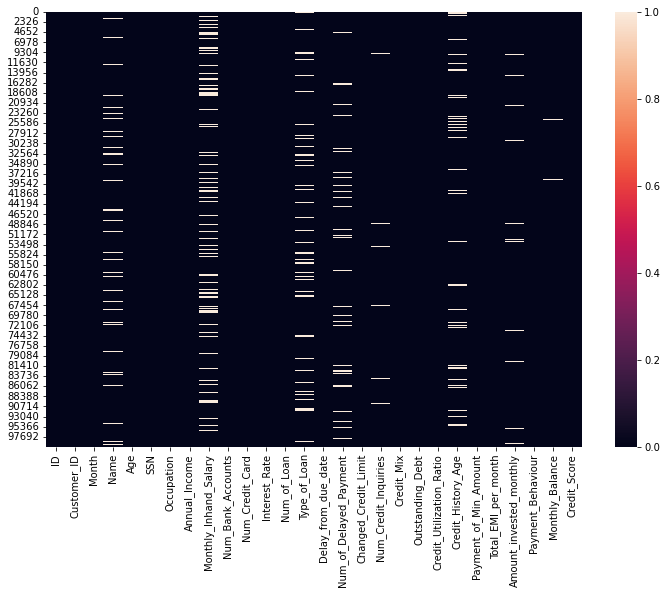

In [3]:
#datos nulos en los datos 
df=pd.read_csv('train.csv')
#val=pd.read_csv('test.csv')
df.head(3)
print(df.shape)
plt.figure(figsize=(12,8))

sns.heatmap(df.isnull())

In [4]:
df['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [5]:
filas_ = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']
pd.set_option('mode.chained_assignment',None)
filas_

['Age',
 'Annual_Income',
 'Num_of_Loan',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Outstanding_Debt',
 'Amount_invested_monthly',
 'Monthly_Balance']

In [6]:
# retirar caracteres de los datos de encabezados
for i in filas_:
    df[i] = df[i].str.replace(r'_+', '')
    

C:\Users\daalu\AppData\Local\Temp\ipykernel_8940\1927047977.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df[i] = df[i].str.replace(r'_+', '')


In [7]:
df.head(10)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


# Filtros 
     A continuación se preentan una serie de filtros para corregir la base de datos 

In [8]:
#filtro para la caracteristica edad 
df['Age']

df['Age']=df['Age'].astype('int')
filtro =df['Age'] < 90
df2 = df[filtro]
filtros=df2['Age']>0
df2=df2[filtros]
df2.head(10)
print(df2['Age'].min)

<bound method NDFrame._add_numeric_operations.<locals>.min of 0        23
1        23
3        23
4        23
5        23
         ..
99995    25
99996    25
99997    25
99998    25
99999    25
Name: Age, Length: 97219, dtype: int32>


(array([95144.,   177.,   153.,   149.,   119.,   144.,   153.,   146.,
          154.,   129.]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <BarContainer object of 10 artists>)

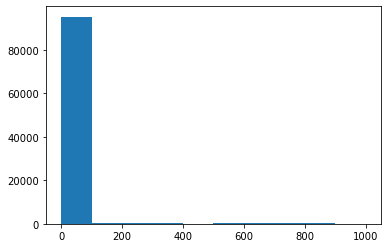

In [9]:
df2['Num_Credit_Card']
filtro3 =df2['Num_Credit_Card'] <=1000
df2 = df2[filtro3]
plt.hist(df2['Num_Credit_Card'])

In [10]:


filtro4 =df2['Num_Bank_Accounts'] >-1
df3 = df2[filtro4]
print(df3['Num_Bank_Accounts'].min())
#df3 = df3[(df3['Num_Bank_Accounts'] <= 750)]

0


In [11]:
df3['Changed_Credit_Limit']=pd.to_numeric(df3['Changed_Credit_Limit'], errors='coerce')
filtro5 =df3['Changed_Credit_Limit'] >-1
df3 = df3[filtro5]


In [12]:
df3['Num_of_Delayed_Payment']=pd.to_numeric(df3['Num_of_Delayed_Payment'])
filtro6 =df3['Num_of_Delayed_Payment'] >=0
df3 = df3[filtro6]
#filtro7 =df3['Num_of_Delayed_Payment']< 100
#df3 = df3[filtro7]
df3['Num_of_Delayed_Payment'].min()
df3

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0x25fe8,CUS_0x942c,March,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.58140274528395,High_spent_Medium_value_payments,NaN,Poor
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,NaN,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,NaN,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,NaN,Poor


In [13]:
filtro8 =df3['Delay_from_due_date']>=0
df3 = df3[filtro8]
#filtro88 =df3['Delay_from_due_date']<=65
#df3 = df3[filtro88]

df3['Delay_from_due_date'].max()

67

In [14]:
df3['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [15]:
#Num_of_Loan: Representa el número de préstamos tomados del banco
df3['Outstanding_Debt']=pd.to_numeric(df3['Outstanding_Debt'])# combierte a varible numerica
df3['Num_of_Loan']=pd.to_numeric(df3['Num_of_Loan'])# combierte a varible numerica
#df3['Amount_invested_monthly']=pd.to_numeric(df3['Amount_invested_monthly'], errors='coerce')# combierte a varible numerica

filtro9 =df3['Num_of_Loan'] >=0
df3 = df3[filtro9]
#filtro10 =df3['Num_of_Loan']< 500
#df3 = df3[filtro10]
#df3.dropna(axis=0, subset=['Outstanding_Debt'], inplace=True)# elimina filas con valores faltantes
#df3.dropna(axis=0, subset=['Num_of_Loan'], inplace=True)# elimina filas con valores faltantes
#df3.dropna(axis=0, subset=['Amount_invested_monthly'], inplace=True)# elimina filas con valores faltantes

#df3 = df3[(df3['Num_of_Loan'] <= 800)]
#df3 = df3[(df3['Outstanding_Debt'] <= 3000)]


df3['Num_of_Loan'].max()
df3

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0x25fe8,CUS_0x942c,March,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.58140274528395,High_spent_Medium_value_payments,NaN,Poor
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,NaN,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,NaN,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,NaN,Poor


In [16]:
# Cambio de variables categoricas a numericas 
df3['Outstanding_Debt']=pd.to_numeric(df3['Outstanding_Debt'])# combierte a varible numerica
df3['Num_of_Loan']=pd.to_numeric(df3['Num_of_Loan'])
df3['Annual_Income']=pd.to_numeric(df3['Annual_Income'])
df3['Amount_invested_monthly']=pd.to_numeric(df3['Amount_invested_monthly'])

In [17]:

#df3.dropna(axis=0, subset=['Annual_Income'], inplace=True)# elimina filas con valores faltantes
#df3['Annual_Income']
#df3 = df3[(df3['Annual_Income'] <= 300000)]


In [18]:
#df3 = df3[(df3['Interest_Rate'] <= 6000)]

In [19]:
#df3 = df3[(df3['Num_Credit_Inquiries'] <= 4000)]

In [20]:
#df3 = df3[(df3['Credit_Utilization_Ratio'] <= 100)]

In [21]:
#df3 = df3[(df3['Total_EMI_per_month'] <= 75000)]

In [22]:
df3['Amount_invested_monthly']=pd.to_numeric(df3['Amount_invested_monthly'])

#df3 = df3[(df3['Amount_invested_monthly'] <= 7000)]

In [23]:
df3['Credit_Score']=df3['Credit_Score'].replace('Good',0)
df3['Credit_Score']=df3['Credit_Score'].replace('Standard',2)
df3['Credit_Score']=df3['Credit_Score'].replace('Poor',1)
df3.corr()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Credit_Score
Age,1.000000,0.005485,0.088603,0.002687,-0.005164,-0.000999,-0.006487,-0.170813,0.000445,-0.154785,-0.003915,-0.201343,0.024395,0.001874,0.000354,-0.057800
Annual_Income,0.005485,1.000000,0.030315,-0.003648,0.002668,-0.002857,0.002824,-0.011139,0.001070,-0.000149,0.001967,-0.003373,0.011842,-0.004434,-0.004503,0.003075
Monthly_Inhand_Salary,0.088603,0.030315,1.000000,-0.008620,-0.007476,-0.007644,-0.011671,-0.247429,0.003048,-0.174002,-0.011603,-0.270104,0.170394,0.007543,0.060542,-0.074003
Num_Bank_Accounts,0.002687,-0.003648,-0.008620,1.000000,-0.004249,-0.003245,-0.001191,0.013397,-0.003143,0.007001,-0.000782,0.016202,0.000303,-0.000221,0.004719,0.000853
Num_Credit_Card,-0.005164,0.002668,-0.007476,-0.004249,1.000000,-0.004119,0.006771,0.018062,-0.000595,0.003073,-0.003295,0.015182,-0.003296,-0.000219,-0.003103,0.002981
Interest_Rate,-0.000999,-0.002857,-0.007644,-0.003245,-0.004119,1.000000,-0.000971,0.010240,0.002842,0.000139,-0.000455,0.009142,0.002150,0.002818,-0.000812,-0.002819
Num_of_Loan,-0.006487,0.002824,-0.011671,-0.001191,0.006771,-0.000971,1.000000,0.012979,0.010845,0.014962,-0.001105,0.025171,-0.006739,0.000970,0.000554,0.002928
Delay_from_due_date,-0.170813,-0.011139,-0.247429,0.013397,0.018062,0.010240,0.012979,1.000000,0.012068,0.291863,0.010803,0.569644,-0.063865,-0.004934,-0.008557,0.088399
Num_of_Delayed_Payment,0.000445,0.001070,0.003048,-0.003143,-0.000595,0.002842,0.010845,0.012068,1.000000,0.006942,0.001801,0.008947,-0.000838,0.001652,0.003289,0.006439
Changed_Credit_Limit,-0.154785,-0.000149,-0.174002,0.007001,0.003073,0.000139,0.014962,0.291863,0.006942,1.000000,0.007161,0.463937,-0.046128,-0.000800,-0.009299,0.188020


In [24]:
dff=df3[(df3['Credit_Score'] < 2)]
dff

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.49408867943663,0
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.45130972736786,0
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,!@9#%8,340.4792117872438,0
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.5653167062043,0
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.391238,High_spent_Large_value_payments,484.5912142650067,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0x25fe8,CUS_0x942c,March,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.581403,High_spent_Medium_value_payments,NaN,1
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,NaN,1
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,NaN,1
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,NaN,1


In [25]:
yla= df3[(df3['Credit_Score'] == 2)]
f3=yla[:30000]


In [26]:

df3=pd.concat([f3,dff], axis=0)
df3
y=df3['Credit_Score']
df3

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.12416760938714,2
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,Low_spent_Small_value_payments,470.69062692529184,2
22,0x1620,CUS_0x2dbc,July,NaN,34,486-85-3974,Engineer,143162.64,12187.220000,1,...,Good,1303.01,38.068624,18 Years and 3 Months,No,246.992319,263.174163,High_spent_Small_value_payments,968.5555173846187,2
23,0x1621,CUS_0x2dbc,August,Langep,34,486-85-3974,Engineer,143162.64,12187.220000,1,...,Good,1303.01,38.374753,18 Years and 4 Months,No,246.992319,10000.000000,High_spent_Small_value_payments,895.494583180492,2
24,0x1626,CUS_0xb891,January,Jasond,54,072-31-6145,Entrepreneur,30689.89,2612.490833,2,...,Good,632.46,26.544229,17 Years and 3 Months,No,16.415452,81.228859,Low_spent_Large_value_payments,433.6047729627723,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0x25fe8,CUS_0x942c,March,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.581403,High_spent_Medium_value_payments,NaN,1
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,NaN,1
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,NaN,1
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,NaN,1


In [27]:
df4=df3.drop(['ID', 'Customer_ID',  'SSN', 'Name', 'Credit_Score'], axis=1)
#df4=df4.dropna()
df4
#df3.isnull().sum()


,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
7,August,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.12416760938714
8,January,28,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,...,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,Low_spent_Small_value_payments,470.69062692529184
22,July,34,Engineer,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",...,3.0,Good,1303.01,38.068624,18 Years and 3 Months,No,246.992319,263.174163,High_spent_Small_value_payments,968.5555173846187
23,August,34,Engineer,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",...,3.0,Good,1303.01,38.374753,18 Years and 4 Months,No,246.992319,10000.000000,High_spent_Small_value_payments,895.494583180492
24,January,54,Entrepreneur,30689.89,2612.490833,2,5,4,1,Not Specified,...,4.0,Good,632.46,26.544229,17 Years and 3 Months,No,16.415452,81.228859,Low_spent_Large_value_payments,433.6047729627723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,March,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,3.0,_,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.581403,High_spent_Medium_value_payments,NaN
99995,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,NaN
99996,May,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,3.0,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,NaN
99997,June,25,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",...,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,NaN


In [28]:
#Cambiar variables categoricas  numericas 
from sklearn.preprocessing import OrdinalEncoder


encoder = OrdinalEncoder(categories=[['Scientist', 'Teacher', 'Engineer',
                                      'Entrepreneur', 'Lawyer',
       'Media_Manager', 'Doctor', 'Journalist', 'Manager', 'Mechanic',
       'Writer', 'Accountant', 'Architect', 'Musician', 'Developer', '_______']])

# Ajustamos el codificador con la variable education y la transformamos
encoder.fit(df4[['Occupation']])
df4['Occupation2'] = encoder.transform(df4[['Occupation']])
df4

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Occupation2
7,August,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.12416760938714,0.0
8,January,28,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,Low_spent_Small_value_payments,470.69062692529184,15.0
22,July,34,Engineer,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",...,Good,1303.01,38.068624,18 Years and 3 Months,No,246.992319,263.174163,High_spent_Small_value_payments,968.5555173846187,2.0
23,August,34,Engineer,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",...,Good,1303.01,38.374753,18 Years and 4 Months,No,246.992319,10000.000000,High_spent_Small_value_payments,895.494583180492,2.0
24,January,54,Entrepreneur,30689.89,2612.490833,2,5,4,1,Not Specified,...,Good,632.46,26.544229,17 Years and 3 Months,No,16.415452,81.228859,Low_spent_Large_value_payments,433.6047729627723,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,March,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,_,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.581403,High_spent_Medium_value_payments,NaN,9.0
99995,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,NaN,9.0
99996,May,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,NaN,9.0
99997,June,25,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,NaN,9.0


In [29]:
df2['Payment_Behaviour'].unique()

encoder = OrdinalEncoder(categories=[['High_spent_Small_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Large_value_payments', '!@9#%8',
       'Low_spent_Large_value_payments',
       'High_spent_Medium_value_payments',
       'Low_spent_Medium_value_payments']])

# Ajustamos el codificador con la variable education y la transformamos
encoder.fit(df4[['Payment_Behaviour']])
df4['Payment_Behaviour2'] = encoder.transform(df4[['Payment_Behaviour']])
df4

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Occupation2,Payment_Behaviour2
7,August,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.12416760938714,0.0,5.0
8,January,28,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,...,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,Low_spent_Small_value_payments,470.69062692529184,15.0,1.0
22,July,34,Engineer,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",...,1303.01,38.068624,18 Years and 3 Months,No,246.992319,263.174163,High_spent_Small_value_payments,968.5555173846187,2.0,0.0
23,August,34,Engineer,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",...,1303.01,38.374753,18 Years and 4 Months,No,246.992319,10000.000000,High_spent_Small_value_payments,895.494583180492,2.0,0.0
24,January,54,Entrepreneur,30689.89,2612.490833,2,5,4,1,Not Specified,...,632.46,26.544229,17 Years and 3 Months,No,16.415452,81.228859,Low_spent_Large_value_payments,433.6047729627723,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,March,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.581403,High_spent_Medium_value_payments,NaN,9.0,5.0
99995,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,NaN,9.0,2.0
99996,May,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,NaN,9.0,5.0
99997,June,25,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",...,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,NaN,9.0,2.0


In [30]:
df2['Month'].unique()

# Creamos el codificador indicandole el orden de la variables
encoder = OrdinalEncoder(categories=[['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August']])

# Ajustamos el codificador con la variable education y la transformamos
encoder.fit(df4[['Month']])
df4['Month2'] = encoder.transform(df4[['Month']])


In [31]:

df4['Credit_Mix'].unique()

encoder = OrdinalEncoder(categories=[['Good', 'Standard', 'Bad','_']])

# Ajustamos el codificador con la variable education y la transformamos
encoder.fit(df4[['Credit_Mix']])
df4['Credit_Mix2'] = encoder.transform(df4[['Credit_Mix']])
df4

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Occupation2,Payment_Behaviour2,Month2,Credit_Mix2
7,August,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.12416760938714,0.0,5.0,7.0,0.0
8,January,28,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,...,26 Years and 7 Months,No,18.816215,104.291825,Low_spent_Small_value_payments,470.69062692529184,15.0,1.0,0.0,0.0
22,July,34,Engineer,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",...,18 Years and 3 Months,No,246.992319,263.174163,High_spent_Small_value_payments,968.5555173846187,2.0,0.0,6.0,0.0
23,August,34,Engineer,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",...,18 Years and 4 Months,No,246.992319,10000.000000,High_spent_Small_value_payments,895.494583180492,2.0,0.0,7.0,0.0
24,January,54,Entrepreneur,30689.89,2612.490833,2,5,4,1,Not Specified,...,17 Years and 3 Months,No,16.415452,81.228859,Low_spent_Large_value_payments,433.6047729627723,3.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,March,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,31 Years and 5 Months,No,35.104023,140.581403,High_spent_Medium_value_payments,NaN,9.0,5.0,2.0,3.0
99995,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,NaN,9.0,2.0,3.0,3.0
99996,May,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,NaN,9.0,5.0,4.0,3.0
99997,June,25,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",...,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,NaN,9.0,2.0,5.0,0.0


In [32]:
df['Payment_of_Min_Amount'].unique()
encoder = OrdinalEncoder(categories=[['No', 'NM', 'Yes']])

# Ajustamos el codificador con la variable education y la transformamos
encoder.fit(df4[['Payment_of_Min_Amount']])
df4['Payment_of_Min_Amount2'] = encoder.transform(df4[['Payment_of_Min_Amount']])
df4

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Occupation2,Payment_Behaviour2,Month2,Credit_Mix2,Payment_of_Min_Amount2
7,August,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,No,49.574949,24.785217,High_spent_Medium_value_payments,358.12416760938714,0.0,5.0,7.0,0.0,0.0
8,January,28,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,...,No,18.816215,104.291825,Low_spent_Small_value_payments,470.69062692529184,15.0,1.0,0.0,0.0,0.0
22,July,34,Engineer,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",...,No,246.992319,263.174163,High_spent_Small_value_payments,968.5555173846187,2.0,0.0,6.0,0.0,0.0
23,August,34,Engineer,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",...,No,246.992319,10000.000000,High_spent_Small_value_payments,895.494583180492,2.0,0.0,7.0,0.0,0.0
24,January,54,Entrepreneur,30689.89,2612.490833,2,5,4,1,Not Specified,...,No,16.415452,81.228859,Low_spent_Large_value_payments,433.6047729627723,3.0,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,March,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,No,35.104023,140.581403,High_spent_Medium_value_payments,NaN,9.0,5.0,2.0,3.0,0.0
99995,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,No,35.104023,60.971333,High_spent_Large_value_payments,NaN,9.0,2.0,3.0,3.0,0.0
99996,May,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,No,35.104023,54.185950,High_spent_Medium_value_payments,NaN,9.0,5.0,4.0,3.0,0.0
99997,June,25,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",...,No,35.104023,24.028477,High_spent_Large_value_payments,NaN,9.0,2.0,5.0,0.0,0.0


In [33]:
#elimina los object
df5=df4.drop(['Occupation', 'Month','Type_of_Loan','Credit_Mix', 'Payment_of_Min_Amount','Payment_Behaviour', 'Credit_History_Age'], axis=1)

df5

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Occupation2,Payment_Behaviour2,Month2,Credit_Mix2,Payment_of_Min_Amount2
7,23,19114.12,1824.843333,3,4,3,4,3,6.0,11.27,...,809.98,23.933795,49.574949,24.785217,358.12416760938714,0.0,5.0,7.0,0.0,0.0
8,28,34847.84,3037.986667,2,4,6,1,3,4.0,5.42,...,605.03,24.464031,18.816215,104.291825,470.69062692529184,15.0,1.0,0.0,0.0,0.0
22,34,143162.64,12187.220000,1,5,8,3,8,6.0,7.10,...,1303.01,38.068624,246.992319,263.174163,968.5555173846187,2.0,0.0,6.0,0.0,0.0
23,34,143162.64,12187.220000,1,5,8,3,8,6.0,7.10,...,1303.01,38.374753,246.992319,10000.000000,895.494583180492,2.0,0.0,7.0,0.0,0.0
24,54,30689.89,2612.490833,2,5,4,1,0,6.0,1.99,...,632.46,26.544229,16.415452,81.228859,433.6047729627723,3.0,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25,39628.99,3359.415833,4,6,7,2,20,6.0,9.50,...,502.38,39.323569,35.104023,140.581403,NaN,9.0,5.0,2.0,3.0,0.0
99995,25,39628.99,3359.415833,4,6,7,2,23,7.0,11.50,...,502.38,34.663572,35.104023,60.971333,NaN,9.0,2.0,3.0,3.0,0.0
99996,25,39628.99,3359.415833,4,6,7,2,18,7.0,11.50,...,502.38,40.565631,35.104023,54.185950,NaN,9.0,5.0,4.0,3.0,0.0
99997,25,39628.99,3359.415833,4,6,5729,2,27,6.0,11.50,...,502.38,41.255522,35.104023,24.028477,NaN,9.0,2.0,5.0,0.0,0.0


<AxesSubplot:>

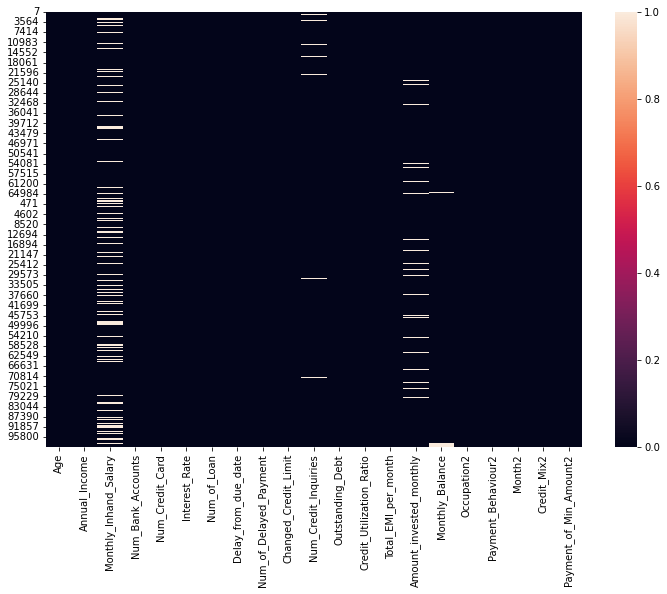

In [34]:
plt.figure(figsize=(12,8))
sns.heatmap(df5.isnull())

<Figure size 864x576 with 0 Axes>

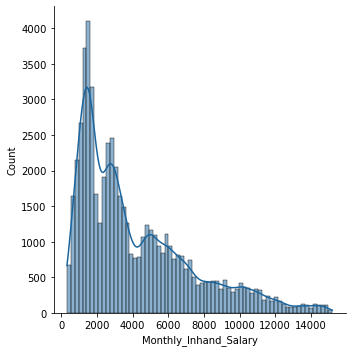

In [35]:
plt.figure(figsize=(12,8))
sns.displot(data=df5, x="Monthly_Inhand_Salary", kde=True, color="#1a659e")

In [36]:
fill_list = df5['Monthly_Inhand_Salary'].dropna().tolist()
df5['Monthly_Inhand_Salary'] = df5['Monthly_Inhand_Salary'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))
'Monthly_Balance'


fill_list = df5['Monthly_Balance'].dropna().tolist()
df5['Monthly_Balance'] = df5['Monthly_Balance'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))
df5


fill_list = df5['Num_Credit_Inquiries'].dropna().tolist()
df5['Num_Credit_Inquiries'] = df5['Num_Credit_Inquiries'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))
df5

fill_list = df5['Amount_invested_monthly'].dropna().tolist()
df5['Amount_invested_monthly'] = df5['Amount_invested_monthly'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))
df5


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Occupation2,Payment_Behaviour2,Month2,Credit_Mix2,Payment_of_Min_Amount2
7,23,19114.12,1824.843333,3,4,3,4,3,6.0,11.27,...,809.98,23.933795,49.574949,24.785217,358.12416760938714,0.0,5.0,7.0,0.0,0.0
8,28,34847.84,3037.986667,2,4,6,1,3,4.0,5.42,...,605.03,24.464031,18.816215,104.291825,470.69062692529184,15.0,1.0,0.0,0.0,0.0
22,34,143162.64,12187.220000,1,5,8,3,8,6.0,7.10,...,1303.01,38.068624,246.992319,263.174163,968.5555173846187,2.0,0.0,6.0,0.0,0.0
23,34,143162.64,12187.220000,1,5,8,3,8,6.0,7.10,...,1303.01,38.374753,246.992319,10000.000000,895.494583180492,2.0,0.0,7.0,0.0,0.0
24,54,30689.89,2612.490833,2,5,4,1,0,6.0,1.99,...,632.46,26.544229,16.415452,81.228859,433.6047729627723,3.0,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25,39628.99,3359.415833,4,6,7,2,20,6.0,9.50,...,502.38,39.323569,35.104023,140.581403,375.7088701239562,9.0,5.0,2.0,3.0,0.0
99995,25,39628.99,3359.415833,4,6,7,2,23,7.0,11.50,...,502.38,34.663572,35.104023,60.971333,407.05661719008,9.0,2.0,3.0,3.0,0.0
99996,25,39628.99,3359.415833,4,6,7,2,18,7.0,11.50,...,502.38,40.565631,35.104023,54.185950,362.8196157277148,9.0,5.0,4.0,3.0,0.0
99997,25,39628.99,3359.415833,4,6,5729,2,27,6.0,11.50,...,502.38,41.255522,35.104023,24.028477,577.2926567237067,9.0,2.0,5.0,0.0,0.0


<AxesSubplot:>

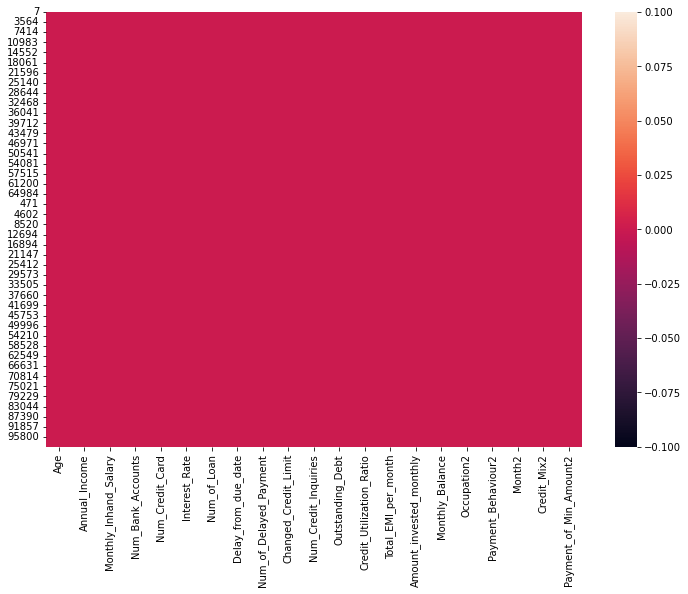

In [37]:
# verificmos la existencia de valores nulos 
plt.figure(figsize=(12,8))
sns.heatmap(df5.isnull())

Text(0.5, 1.0, 'Distribución e los datos de crédito')

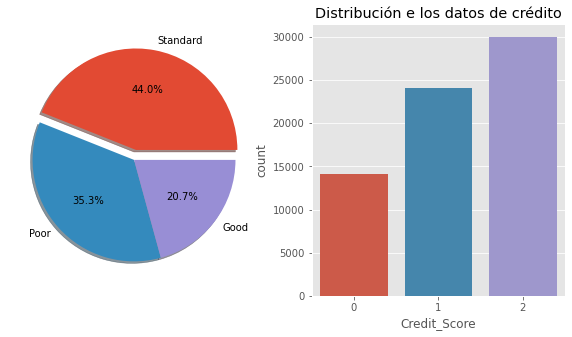

In [38]:
#Cómo estan los datos segun la clasificación.


plt.rcParams['figure.figsize']=('12, 6')# figuras de 12*6
plt.style.use('ggplot') #tono gris

plt.figure(figsize=(10,5))

#plot pie chart
plt.subplot(1,2,1)
label = df['Credit_Score'].value_counts().index
label_count = df3['Credit_Score'].value_counts().values
plt.pie(data=df3['Credit_Score'], x=label_count, labels=label, autopct='%1.1f%%', explode=[0.1, 0, 0] , shadow=True, radius=1)

#
plt.subplot(1,2,2)
sns.countplot(x=df3['Credit_Score'], data=df3['Credit_Score'])
plt.title('Distribución e los datos de crédito')


## Correlación 

In [39]:

df6=pd.concat([df5,df3['Credit_Score']], axis=1)
df6.corr()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Occupation2,Payment_Behaviour2,Month2,Credit_Mix2,Payment_of_Min_Amount2,Credit_Score
Age,1.000000,0.005820,0.077348,0.002904,-0.006041,-0.002148,-0.005031,-0.176334,-0.000169,-0.150347,...,-0.204505,0.025485,0.003922,0.002935,0.010705,0.020052,0.020977,-0.137865,-0.251938,-0.073694
Annual_Income,0.005820,1.000000,0.026853,-0.003505,0.003460,-0.001539,0.004682,-0.009969,0.001825,0.000095,...,-0.003066,0.010908,-0.005468,-0.004543,0.002091,0.003573,0.000016,-0.003417,-0.008972,0.002076
Monthly_Inhand_Salary,0.077348,0.026853,1.000000,-0.006297,-0.006445,-0.007536,-0.008902,-0.211616,0.002187,-0.143800,...,-0.234650,0.145675,0.009665,0.049133,0.000705,0.109125,0.000776,-0.168276,-0.252759,-0.077805
Num_Bank_Accounts,0.002904,-0.003505,-0.006297,1.000000,-0.002905,-0.003655,-0.000288,0.013422,-0.002174,0.009504,...,0.017194,-0.000915,0.000525,0.002160,0.004967,0.005361,-0.003511,0.007495,0.011526,0.002139
Num_Credit_Card,-0.006041,0.003460,-0.006445,-0.002905,1.000000,-0.006192,0.007346,0.021093,0.001305,0.003032,...,0.017717,-0.004563,0.000161,-0.004877,0.007330,-0.003033,-0.001282,0.011259,0.014637,0.001850
Interest_Rate,-0.002148,-0.001539,-0.007536,-0.003655,-0.006192,1.000000,-0.000896,0.011847,0.001333,0.001750,...,0.008879,0.003927,0.002621,-0.000218,-0.001229,0.003977,0.002322,0.000332,0.007427,-0.004810
Num_of_Loan,-0.005031,0.004682,-0.008902,-0.000288,0.007346,-0.000896,1.000000,0.012871,0.012778,0.014855,...,0.023876,-0.007906,0.002144,0.000622,-0.000868,-0.006642,0.000652,0.010213,0.016117,0.004269
Delay_from_due_date,-0.176334,-0.009969,-0.211616,0.013422,0.021093,0.011847,0.012871,1.000000,0.012339,0.281883,...,0.568729,-0.063111,-0.004821,-0.005391,-0.008927,-0.035478,-0.007928,0.386306,0.480988,0.122864
Num_of_Delayed_Payment,-0.000169,0.001825,0.002187,-0.002174,0.001305,0.001333,0.012778,0.012339,1.000000,0.009220,...,0.007951,-0.000920,0.004183,0.003182,0.002718,-0.002995,-0.001275,0.011359,0.014411,0.006275
Changed_Credit_Limit,-0.150347,0.000095,-0.143800,0.009504,0.003032,0.001750,0.014855,0.281883,0.009220,1.000000,...,0.458416,-0.042625,-0.003256,-0.009955,0.000743,-0.027563,0.001915,0.232117,0.465715,0.204545


<AxesSubplot:>

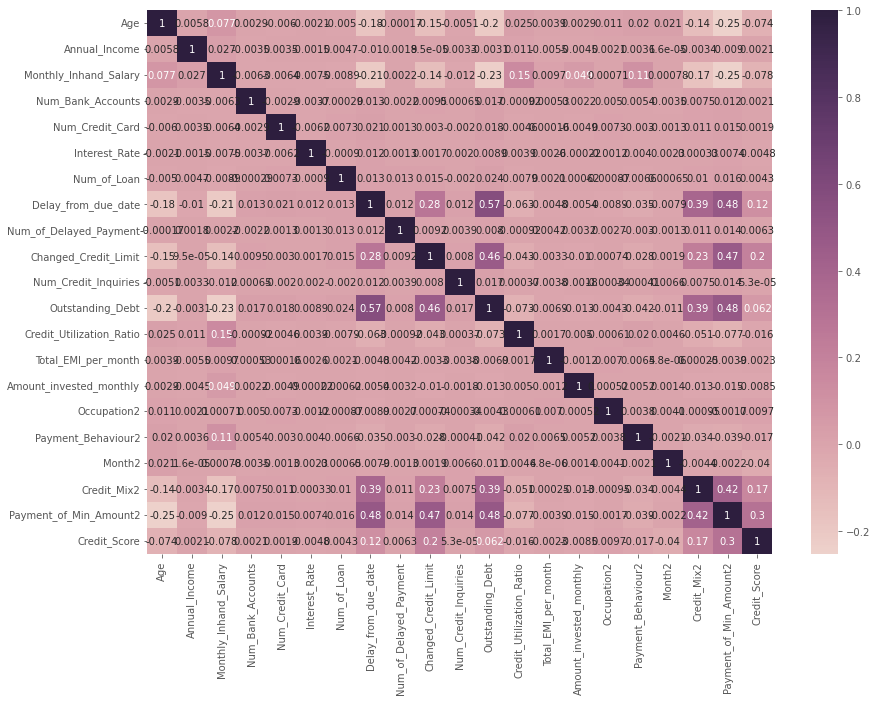

In [40]:



plt.figure(figsize = (14,10))
sns.heatmap(df6.corr() , annot = True , cmap =sns.cubehelix_palette(as_cmap=True))

In [41]:
#sns.pairplot(df3, hue='Credit_Score' )
#plt.show()

In [42]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
numeric_cols = df6.select_dtypes(exclude = "object").columns
vif_df = df6[numeric_cols]; vif_data = pd.DataFrame()
vif_data["feature"] = vif_df.columns
vif_data["VIF"] = [variance_inflation_factor(vif_df.values ,i) for i in range(len(vif_df.columns))]
vif_data.head(17)

,feature,VIF
0,Age,9.253589
1,Annual_Income,1.015709
2,Monthly_Inhand_Salary,3.000583
3,Num_Bank_Accounts,1.021778
4,Num_Credit_Card,1.035425
5,Interest_Rate,1.024338
6,Num_of_Loan,1.015056
7,Delay_from_due_date,5.020311
8,Num_of_Delayed_Payment,1.019691
9,Changed_Credit_Limit,4.924728


In [43]:
round(abs(df6.corr()['Credit_Score']*100).sort_values(ascending=False), 2)

Credit_Score                100.00
Payment_of_Min_Amount2       29.68
Changed_Credit_Limit         20.45
Credit_Mix2                  16.90
Delay_from_due_date          12.29
Monthly_Inhand_Salary         7.78
Age                           7.37
Outstanding_Debt              6.21
Month2                        4.01
Payment_Behaviour2            1.68
Credit_Utilization_Ratio      1.60
Occupation2                   0.97
Amount_invested_monthly       0.85
Num_of_Delayed_Payment        0.63
Interest_Rate                 0.48
Num_of_Loan                   0.43
Total_EMI_per_month           0.23
Num_Bank_Accounts             0.21
Annual_Income                 0.21
Num_Credit_Card               0.19
Num_Credit_Inquiries          0.01
Name: Credit_Score, dtype: float64

In [44]:
#Los menos relacionados 
df7=df5.drop([  'Payment_of_Min_Amount2','Changed_Credit_Limit',   'Delay_from_due_date',  'Monthly_Inhand_Salary', 'Outstanding_Debt', 
              'Credit_Utilization_Ratio',  'Age',  'Occupation2', 'Payment_Behaviour2',
              'Num_Credit_Card', 'Amount_invested_monthly', 'Num_Bank_Accounts', 
              'Interest_Rate', 'Num_Credit_Inquiries', 'Month2', 'Credit_Mix2' ], axis=1)


In [45]:
df8=df5.loc[:,['Monthly_Inhand_Salary', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Credit_Utilization_Ratio', 'Occupation2', 'Payment_Behaviour2' ]]
df8

,Monthly_Inhand_Salary,Delay_from_due_date,Changed_Credit_Limit,Credit_Utilization_Ratio,Occupation2,Payment_Behaviour2
7,1824.843333,3,11.27,23.933795,0.0,5.0
8,3037.986667,3,5.42,24.464031,15.0,1.0
22,12187.220000,8,7.10,38.068624,2.0,0.0
23,12187.220000,8,7.10,38.374753,2.0,0.0
24,2612.490833,0,1.99,26.544229,3.0,4.0
...,...,...,...,...,...,...
99994,3359.415833,20,9.50,39.323569,9.0,5.0
99995,3359.415833,23,11.50,34.663572,9.0,2.0
99996,3359.415833,18,11.50,40.565631,9.0,5.0
99997,3359.415833,27,11.50,41.255522,9.0,2.0


In [46]:
df9=df5.drop(['Payment_of_Min_Amount2','Credit_Mix2','Num_Credit_Inquiries','Num_of_Loan', 'Delay_from_due_date','Num_of_Delayed_Payment',
             'Delay_from_due_date', ],axis=1)
df9

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Changed_Credit_Limit,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Occupation2,Payment_Behaviour2,Month2
7,23,19114.12,1824.843333,3,4,3,11.27,809.98,23.933795,49.574949,24.785217,358.12416760938714,0.0,5.0,7.0
8,28,34847.84,3037.986667,2,4,6,5.42,605.03,24.464031,18.816215,104.291825,470.69062692529184,15.0,1.0,0.0
22,34,143162.64,12187.220000,1,5,8,7.10,1303.01,38.068624,246.992319,263.174163,968.5555173846187,2.0,0.0,6.0
23,34,143162.64,12187.220000,1,5,8,7.10,1303.01,38.374753,246.992319,10000.000000,895.494583180492,2.0,0.0,7.0
24,54,30689.89,2612.490833,2,5,4,1.99,632.46,26.544229,16.415452,81.228859,433.6047729627723,3.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25,39628.99,3359.415833,4,6,7,9.50,502.38,39.323569,35.104023,140.581403,375.7088701239562,9.0,5.0,2.0
99995,25,39628.99,3359.415833,4,6,7,11.50,502.38,34.663572,35.104023,60.971333,407.05661719008,9.0,2.0,3.0
99996,25,39628.99,3359.415833,4,6,7,11.50,502.38,40.565631,35.104023,54.185950,362.8196157277148,9.0,5.0,4.0
99997,25,39628.99,3359.415833,4,6,5729,11.50,502.38,41.255522,35.104023,24.028477,577.2926567237067,9.0,2.0,5.0


In [47]:
y=df6['Credit_Score']


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler



In [63]:
#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df5, y,  train_size=0.7, stratify = df6['Credit_Score'])


In [ ]:
"""
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler as rbScaler  
ro_scaler = rbScaler()
X_train = ro_scaler.fit_transform(X_train)
X_test = ro_scaler.fit_transform(X_test)
[X_train.shape, X_test.shape]
"""

In [64]:
from sklearn.preprocessing import PowerTransformer

scalar = PowerTransformer(method='yeo-johnson', standardize=True).fit(X_train)

X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

C:\Users\daalu\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


# El que mejor predice 
Hacemos un comparativo de algoritmos de aprendizaje supervisado con el que mejor presenta métricas de predicción 

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, r2_score


GBC = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0,
                                 max_depth=1)
GBC.fit(X_train, y_train)
predicGBC = GBC.predict(X_test)
print('La probabilidad de acierto  para GradientBoostingClassifier \n')
print((np.sum(predicGBC == y_test)/len(predicGBC))*100)
print(predicGBC.sum())
print('Matrix de Confusion \n')
print(pd.crosstab(y_test, predicGBC, rownames=['True'], colnames=['Predicted'], margins=True))
print(classification_report(y_test, predicGBC))

print("Accuracy con Datos test {:.2f}".format(accuracy_score(y_test, predicGBC)*100))
#print("Accuracy con Datos validación {:.2f}".format(accuracy_score(y_val, predicGBC)*100))
r2 = r2_score(y_test, predicGBC)
r2

La probabilidad de acierto  para GradientBoostingClassifier 

68.16783080154349
24396
Matrix de Confusion 

Predicted     0     1     2    All
True                              
0          2871   184  1192   4247
1           630  5074  1522   7226
2          1301  1688  6011   9000
All        4802  6946  8725  20473
              precision    recall  f1-score   support

           0       0.60      0.68      0.63      4247
           1       0.73      0.70      0.72      7226
           2       0.69      0.67      0.68      9000

    accuracy                           0.68     20473
   macro avg       0.67      0.68      0.68     20473
weighted avg       0.68      0.68      0.68     20473

Accuracy con Datos test 68.17


-0.1525463594443297

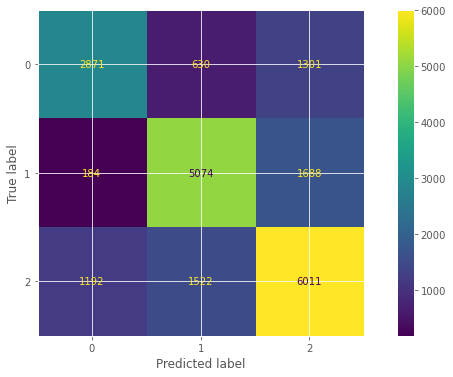

In [66]:
from sklearn import metrics
cm = metrics.confusion_matrix(predicGBC, y_test)
cmd = metrics.ConfusionMatrixDisplay(cm)
cmd.plot()


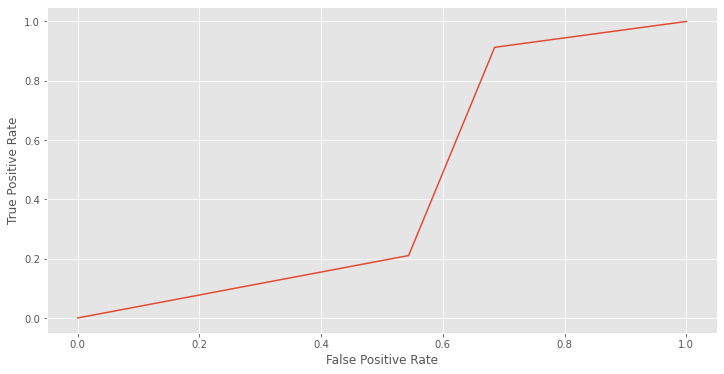

In [67]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
roc_curve(y_test, predicGBC, pos_label=1)
fpr, tpr, _ = roc_curve(y_test, predicGBC, pos_label=1)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [68]:

from sklearn.svm import SVC

In [69]:
"""
SVM = SVC(kernel="linear")
SVM.fit(X_train,y_train)

predicSVM = SVM.predict(X_test)
#print('combinacion',pair)
print('la probabilidad de acierto Máquina de vectores de soporte Lineal\n')
print((np.sum(predicSVM == y_test)/len(predicSVM))*100)
print(predicSVM.sum())
print('matrix de Confusion')
print(pd.crosstab(y_test, predicSVM, rownames=['True'], colnames=['Predicted'], margins=True))
print(classification_report(y_test, predicSVM))
"""

'\nSVM = SVC(kernel="linear")\nSVM.fit(X_train,y_train)\n\npredicSVM = SVM.predict(X_test)\n#print(\'combinacion\',pair)\nprint(\'la probabilidad de acierto Máquina de vectores de soporte Lineal\n\')\nprint((np.sum(predicSVM == y_test)/len(predicSVM))*100)\nprint(predicSVM.sum())\nprint(\'matrix de Confusion\')\nprint(pd.crosstab(y_test, predicSVM, rownames=[\'True\'], colnames=[\'Predicted\'], margins=True))\nprint(classification_report(y_test, predicSVM))\n'

In [70]:
"""
SVM = SVC(degree=2, kernel="poly",probability=True)
SVM.fit(X_train, y_train)

#predict_boundary(X, Y, plot_step, plot_colors, SVM, x_label, y_label)
predicsv2 = SVM.predict(X_test)

print('la probabilidad de acierto  Máquina de vectores de soporte Polinomial \n')

print((np.sum(predicsv2 == y_test)/len(predicsv2))*100)
print(predicsv2.sum())
print('matrix de Confusion')
print(pd.crosstab(y_test, predicsv2, rownames=['True'], colnames=['Predicted'], margins=True))
print(classification_report(y_test, predicsv2))
"""

'\nSVM = SVC(degree=2, kernel="poly",probability=True)\nSVM.fit(X_train, y_train)\n\n#predict_boundary(X, Y, plot_step, plot_colors, SVM, x_label, y_label)\npredicsv2 = SVM.predict(X_test)\n\nprint(\'la probabilidad de acierto  Máquina de vectores de soporte Polinomial \n\')\n\nprint((np.sum(predicsv2 == y_test)/len(predicsv2))*100)\nprint(predicsv2.sum())\nprint(\'matrix de Confusion\')\nprint(pd.crosstab(y_test, predicsv2, rownames=[\'True\'], colnames=[\'Predicted\'], margins=True))\nprint(classification_report(y_test, predicsv2))\n'

In [71]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)
predicNB = NB.predict(X_test)

print('la probabilidad de acierto  Naiver Bayes\n')
print((np.sum(predicNB == y_test)/len(predicNB))*100)
print(predicNB.sum())
print('matrix de Confusion')
print(pd.crosstab(y_test, predicNB, rownames=['True'], colnames=['Predicted'], margins=True))
print(classification_report(y_test, predicNB))

la probabilidad de acierto  Naiver Bayes

62.42856445074
19707
matrix de Confusion
Predicted     0     1     2    All
True                              
0          3211   235   801   4247
1          1108  5480   638   7226
2          1976  2934  4090   9000
All        6295  8649  5529  20473
              precision    recall  f1-score   support

           0       0.51      0.76      0.61      4247
           1       0.63      0.76      0.69      7226
           2       0.74      0.45      0.56      9000

    accuracy                           0.62     20473
   macro avg       0.63      0.66      0.62     20473
weighted avg       0.65      0.62      0.62     20473



In [72]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(max_depth=2)
RFC.fit(X_train,y_train)
predicRFC = RFC.predict(X_test)

accuracy_score(y_test, predicRFC)
print('la probabilidad de acierto  Random Forest\n')
print((np.sum(predicRFC == y_test)/len(predicRFC))*100)
print(predicGBC.sum())
print('matrix de Confusion')
print(pd.crosstab(y_test, predicRFC, rownames=['True'], colnames=['Predicted'], margins=True))
print(classification_report(y_test, predicRFC))


la probabilidad de acierto  Random Forest

65.3592536511503
24396
matrix de Confusion
Predicted     0     1     2    All
True                              
0          2383   102  1762   4247
1           712  5140  1374   7226
2          1209  1933  5858   9000
All        4304  7175  8994  20473
              precision    recall  f1-score   support

           0       0.55      0.56      0.56      4247
           1       0.72      0.71      0.71      7226
           2       0.65      0.65      0.65      9000

    accuracy                           0.65     20473
   macro avg       0.64      0.64      0.64     20473
weighted avg       0.65      0.65      0.65     20473



In [73]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
prediclog= logreg.predict(X_test)

accuracy_score(y_test, prediclog)
print('la probabilidad de acierto  Regresión logistica\n')
print((np.sum(prediclog == y_test)/len(prediclog))*100)
print(prediclog.sum())
print('matrix de Confusion')
print(pd.crosstab(y_test, prediclog, rownames=['True'], colnames=['Predicted'], margins=True))
print(classification_report(y_test, prediclog))


la probabilidad de acierto  Regresión logistica

62.75582474478581
25437
matrix de Confusion
Predicted     0     1     2    All
True                              
0          2454   243  1550   4247
1           578  4672  1976   7226
2          1252  2026  5722   9000
All        4284  6941  9248  20473
              precision    recall  f1-score   support

           0       0.57      0.58      0.58      4247
           1       0.67      0.65      0.66      7226
           2       0.62      0.64      0.63      9000

    accuracy                           0.63     20473
   macro avg       0.62      0.62      0.62     20473
weighted avg       0.63      0.63      0.63     20473



# Conclusiones
 



El mejor algorimo con todos los datos 
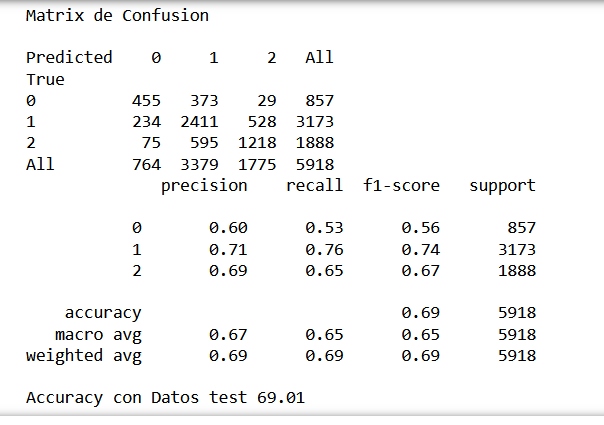


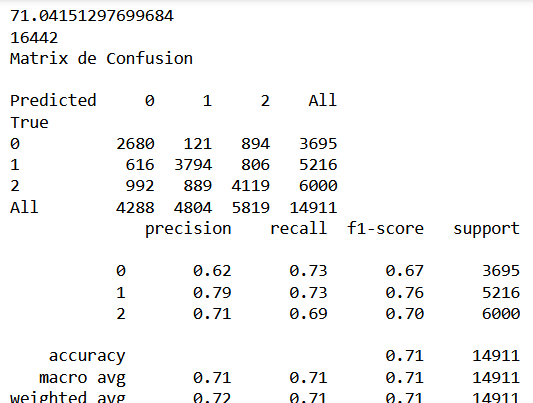
dado que no preseta sobre ajuste en los datos 
En todos los casos la mejore métrica para hacer la clasificación fue GradientBoostingClassifier, así que fue la métrica con la que compare el filtrado de datos, por ultimo utilice el ajuste de hiperparámetros de la librería de sklearn sklearn-genetic-opt 

In [74]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# Compare Algorithms
# prepare models
models=[]
RMSE = []
R_sq = []
models.append(('LOR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('k-NN', KNeighborsClassifier(n_neighbors=3)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))
models.append(('GBC',  GradientBoostingClassifier(n_estimators=200, learning_rate=0.7,
                                 max_depth=1)))


# evaluate each model in turn
results = []
names = []
scoring= 'accuracy'
for name, model in models:
    kfold= KFold(n_splits=10)
    cv_results= cross_val_score(model, df5, y, cv=kfold, scoring=scoring)
    names.append(name)
    print(f'Accuracy de {name}: {cv_results.mean()*100.0:,.2f}% (std:{cv_results.std()*100.0:,.2f}%)')

C:\Users\daalu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\daalu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

Accuracy de LOR: 20.74% (std:17.51%)
Accuracy de LDA: 51.99% (std:3.06%)
Accuracy de k-NN: 37.47% (std:4.63%)
Accuracy de CART: 52.86% (std:2.91%)
Accuracy de NB: 32.73% (std:28.27%)
Accuracy de GBC: 63.13% (std:2.22%)


In [75]:
from lazypredict.Supervised import LazyClassifier


clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

 41%|███████████████████████████████▊                                             | 12/29 [1:17:13<1:49:24, 386.16s/it]


KeyboardInterrupt: 

In [ ]:
#ajuste de hiperparamétros

#!pip install sklearn-genetic-opt

In [76]:
import matplotlib.pyplot as plt
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Categorical, Integer, Continuous
from sklearn.model_selection import train_test_split, StratifiedKFold

from sklearn.metrics import accuracy_score

In [77]:

param_grid = {'learning_rate':Integer(0, 20),
              'n_estimators':Integer(100, 300),
              'max_depth':Integer(1, 5)
              }



In [78]:
GBC= GradientBoostingClassifier()

In [79]:
# Our cross-validation strategy (it could be just an int)
cv = StratifiedKFold(n_splits=10, shuffle=True)

# The main class from sklearn-genetic-opt
evolved_estimator = GASearchCV(estimator=GBC,
                               cv=cv, # generador de cross-validación
                               scoring='accuracy',
                               param_grid=param_grid,
                               #n_jobs=-1, # uso de los procesadores -1 todos
                               verbose=True) # mostrar resultados

In [ ]:
evolved_estimator.fit(X_train, y_train)

In [ ]:
print(evolved_estimator.best_params_)

y_predict_ga = evolved_estimator.predict(X_test)
print(accuracy_score(y_test, y_predict_ga))

In [ ]:
accuracy_score(y_test, y_predict_ga)